### Correlation between Model Multiplicity and Mean of Absolute Differences

### Import libraries and set plotting style

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sys.path.append('../scr')
from data_preprocessing import *
from analysis import *
from plot import *


 ### Feature Numbers and Model Types

In [3]:
feature_numbers = ['9', '20']  
model_types = ['LP','RP','LB','RB']  

### Load CSV files

In [4]:
df_predictions = load_and_clean_predictions('credit','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/credit_predictions_9LP_1204_2151.csv for model 9LP
Loaded file: ../predictions/credit_predictions_9RP_1204_2202.csv for model 9RP
Loaded file: ../predictions/credit_predictions_9LB_1204_2208.csv for model 9LB
Loaded file: ../predictions/credit_predictions_9RB_1204_2218.csv for model 9RB
Loaded file: ../predictions/credit_predictions_20LP_1104_2235.csv for model 20LP
Loaded file: ../predictions/credit_predictions_20RP_1104_2259.csv for model 20RP
Loaded file: ../predictions/credit_predictions_20LB_1110_2357.csv for model 20LB
Loaded file: ../predictions/credit_predictions_20RB_1111_0022.csv for model 20RB


In [5]:
# df_predictions['20']['LP']

### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}

In [6]:
mean_of_abs_diff_df = {}
prefixes = ['LM', 'RM', 'LM', 'RM']

for model_type, prefix in zip(model_types, prefixes):
    abs_diff_9vs20 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['9'][model_type], 
            df_predictions['20'][model_type], 
            substring_1=f'9{prefix}', 
            substring_2=f'20{prefix}'
        )
    )['mean']
 
    mean_of_abs_diff_df[model_type] = pd.DataFrame({
        'abs_diff_9vs20': abs_diff_9vs20,
    })

combined_mean_of_abs_diff_df = pd.concat(mean_of_abs_diff_df, axis=1)

#print(combined_mean_of_abs_diff_df)

### Probabilities

Correlation between Model Multiplicity of Lower Feature Set Model and Absolute Mean Differences
- (9LP vs. 20LP) and 9LP Model Multiplicity
- (9RP vs. 20RP) and 9RP Model Multiplicity 

Correlation between Model Multiplicity (9LP) and Mean of Absolute Differences (9LP vs. 20LP)
Correlation coefficient: 0.5066145626145626


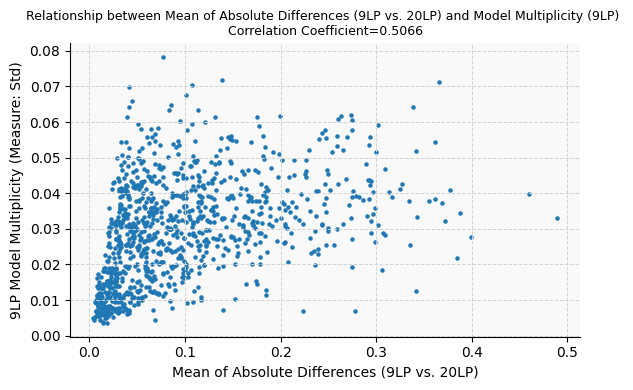

Correlation between Model Multiplicity (9RP) and Mean of Absolute Differences (9RP vs. 20RP)
Correlation coefficient: 0.43947895479739174


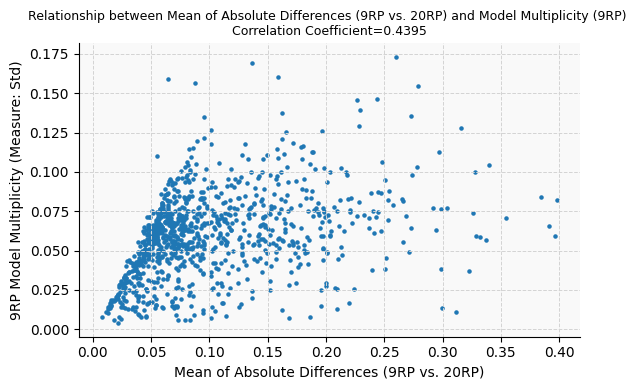

In [9]:
model_types_P = ['LP', 'RP'] 

for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['9vs20'],  
        comparison_labels=[f'9{model_type} vs. 20{model_type}'],  
        primary_model='9', 
        dynamic_base_model=False
    )

Correlation between Model Multiplicity of Higher Feature Set Model and Absolute Mean Differences
- (2LP vs. 7LP) and 7LP Model Multiplicity
- (2RP vs. 7RP) and 7RP Model Multiplicity 

- (2LP vs. 9LP) and 7LP Model Multiplicity
- (2RP vs. 9RP) and 7RP Model Multiplicity 

Correlation between Model Multiplicity (20LP) and Mean of Absolute Differences (9LP vs. 20LP)


Correlation coefficient: 0.4256452976452977


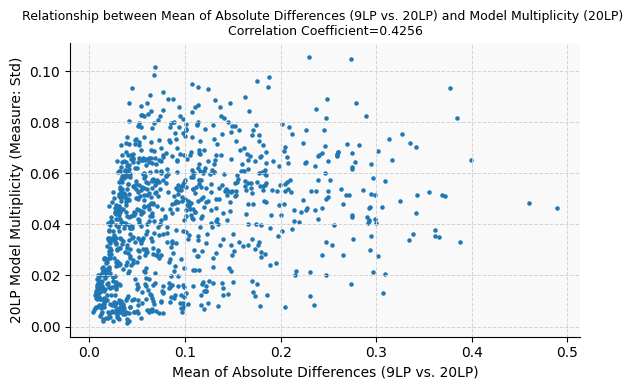

Correlation between Model Multiplicity (20RP) and Mean of Absolute Differences (9RP vs. 20RP)
Correlation coefficient: 0.4908186542911103


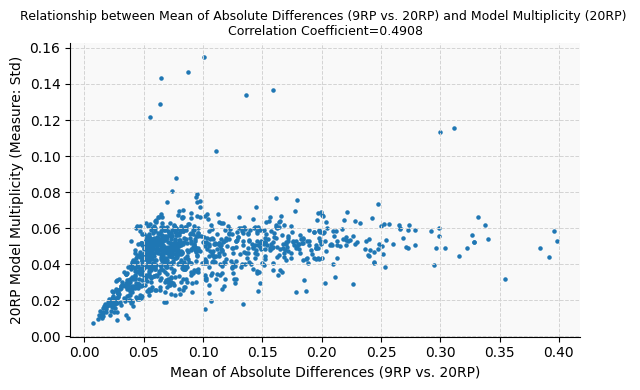

In [10]:
for model_type in model_types_P:
    correl_multiplicity_differences(
        df_predictions=df_predictions,
        combined_mean_of_abs_diff=combined_mean_of_abs_diff_df,
        model_type=model_type, 
        std='std', 
        abs_diff_keys=['9vs20'], 
        comparison_labels=[f'9{model_type} vs. 20{model_type}'],
        primary_model='2', 
        dynamic_base_model=True  
    )

### Binary values

### Agreement (Model Multiplicity Measure)

1. Number of models that predict 1:
\begin{align}
S_1 = \sum_{i=1}^{N} p_i 
\end{align}

2. Number of models that predict 0:
\begin{align}
S_0 = N - S_1 
\end{align}

3. Proportion of models agreeing with the majority prediction:
\begin{align}
\text{Agreement} = \max\left( \frac{S_1}{N}, \frac{S_0}{N} \right)
\end{align}

In [11]:
model_multiplicity_LB = {}
model_multiplicity_RB = {}


for feature_number in feature_numbers:
    model_multiplicity_LB[feature_number], _, _ = compute_binary_model_multiplicity(df_predictions, feature_number, column='LB')
    model_multiplicity_RB[feature_number], _, _ = compute_binary_model_multiplicity(df_predictions, feature_number, column='RB')


   ID     S1     S0    N  Agreement
0   0    1.0  197.0  198   0.994949
1   1  196.0    0.0  196   1.000000
2   2  199.0    0.0  199   1.000000
3   3  198.0    8.0  206   0.961165
4   4   45.0  142.0  187   0.759358
Minimum agreement value:  0.5071090047393365
Minimum agreement value count:  1
   ID     S1     S0    N  Agreement
0   0    5.0  193.0  198   0.974747
1   1  192.0    4.0  196   0.979592
2   2   69.0  130.0  199   0.653266
3   3  206.0    0.0  206   1.000000
4   4  186.0    1.0  187   0.994652
Minimum agreement value:  0.5
Minimum agreement value count:  1
   ID     S1     S0    N  Agreement
0   0    0.0  198.0  198   1.000000
1   1   55.0  141.0  196   0.719388
2   2  198.0    1.0  199   0.994975
3   3  202.0    4.0  206   0.980583
4   4  145.0   42.0  187   0.775401
Minimum agreement value:  0.5
Minimum agreement value count:  1
   ID     S1     S0    N  Agreement
0   0    4.0  194.0  198   0.979798
1   1  196.0    0.0  196   1.000000
2   2  186.0   13.0  199   0.934673
3

Correlation: -0.4127


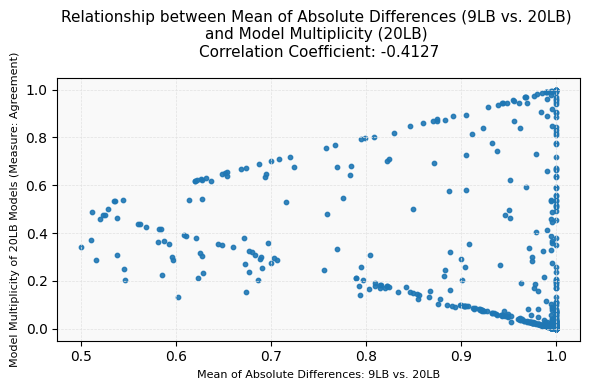

Correlation: -0.4806


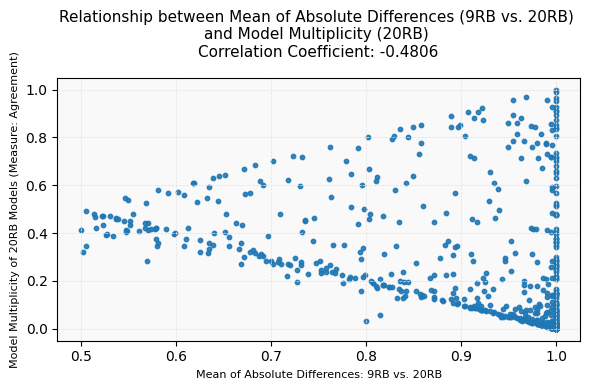

In [12]:
model_types = ['LB', 'RB']
comparison_keys = {
    '9vs20': '20',
}

correlations = {}

for model_type in model_types:
    for comparison_key, base_model in comparison_keys.items():
        model_multiplicity = model_multiplicity_LB if model_type == 'LB' else model_multiplicity_RB
        
        correlations[f'{comparison_key}_{model_type}'] = correl_agreement_differences(
            model_multiplicity=model_multiplicity[base_model],
            combined_mean_of_abs_diff_df=combined_mean_of_abs_diff_df,
            model_type=model_type,
            base_model=base_model,
            comparison_key=comparison_key
        )
